### Edgar Moises Hernandez-Gonzalez
#### 11/03/20-01/07/20
#### Imagen de STFT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import cv2

In [2]:
#la muestra 3 es mano derecha
# canal C3 (canal 8)
# canal C4 (canal 12) (usar este)
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[2, 11000:12000]
# canal = pd.read_csv("Ventaneo-A01T.csv", header=None).iloc[43:64, 5500:6000]

In [3]:
canal.shape

(1000,)

(1000,)


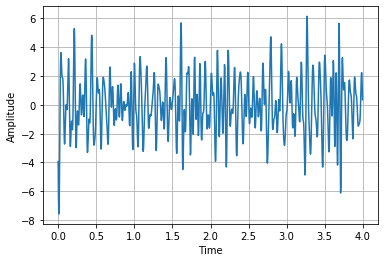

In [4]:
# 4 segundos con fs=250Hz
fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs=250, window='hann', nperseg=250, noverlap=225, nfft=500, scaling='spectrum')

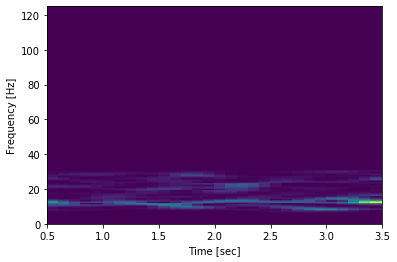

In [6]:
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [7]:
print(f[16])
print(f[60])

8.0
30.0


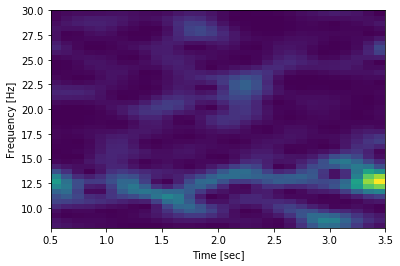

In [8]:
# Espectrograma con spectrogram, STFFT (Zoom)
plt.pcolormesh(t, f, Sxx)
plt.axis([t[0], t[-1:], f[16], f[60]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [9]:
print("Shape Espectrograma:", Sxx.shape)
print("Valores de f:\n", f[16:61])

Shape Espectrograma: (251, 31)
Valores de f:
 [ 8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30. ]


STFFT
(45, 31)


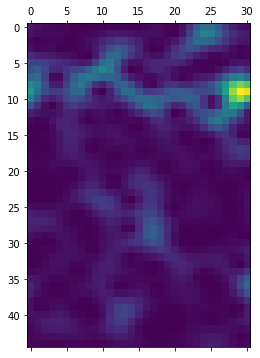

In [10]:
print("STFFT")
x = Sxx[16:61, :]
print(x.shape)
plt.matshow(x)
plt.show()

STFFT a escala de grises, esto es lo que se va a clasificar
(45, 31)
[[0.16741947 0.1275015  0.08607964 ... 0.22866046 0.11773347 0.09252183]
 [0.14236769 0.09104982 0.05894102 ... 0.3498001  0.23210927 0.18073838]
 [0.06104197 0.01093097 0.02968493 ... 0.25865159 0.17060831 0.15530355]
 ...
 [0.03663467 0.10797021 0.17345732 ... 0.10324227 0.08302332 0.11048384]
 [0.03705969 0.0649048  0.08674153 ... 0.06451523 0.00326068 0.03394838]
 [0.03542219 0.03684119 0.02656527 ... 0.07689484 0.04356824 0.06464844]]


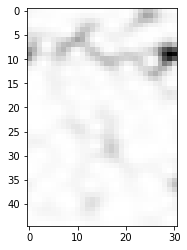

In [11]:
print("STFFT a escala de grises, esto es lo que se va a clasificar")
print(x.shape)
print(x)
plt.imshow(x, cmap='Greys')
plt.show()

(22, 15)


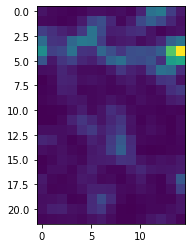

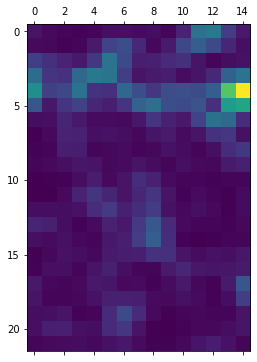

In [12]:
# en el resize solo las filas se dividen / 2
dim = (15, 22) #ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()